In [11]:
import pandas as pd
import numpy as np
import scipy.optimize as sci
import matplotlib.pyplot as plt


url = 'https://github.com/MatthewDShen/Computing-In-Civil-Final-Project/raw/main/input/Revised%20Copy%20of%20Mobility%20Project%20Survey%20(Responses).csv'
df = pd.read_csv(url)

df.head()

,Timestamp,Are you:,Age Group:,Gender:,Average Family Income:,Type of Residence:,Preferred Mode of Transportation for travel between campuses/ in campus:,"If you use the NYU Bus system, which route do you use the most?:",Average travel time of preferred mode (min):,Average cost of preferred mode:,Origin of Trip:,Destination of Trip:,"Main purpose of trip (Classes, shopping, food, etc.):","Inconveniences of preferred mode of transportation (long walking distances, expensive costs, waiting period, etc.):","Comforts (when applicable) of preferred mode of transportation (cleanliness, safety, seating availability, etc.):"
0,12/20/2020 10:58,Underdraduate,18-22,Female,$61k-$80k,Live with Parents at home,MTA Transit/Subway,NaN,40,5.5,Tandon,Tandon,Classes,Waiting Period,Cost
1,12/20/2020 10:59,Underdraduate,18-22,Male,$41k-$60k,Dorming,Bike,NaN,12,0,Lafayette,Tandon,"Classes, Work",Weather,"Efficiency, Space, Clean"
2,12/20/2020 13:08,Underdraduate,18-22,Female,> $100k,Dorming,MTA Transit/Subway,NaN,20,5.5,Lafayette,Washington Square,"Classes, Food, Shopping",Waiting Period,Speed
3,12/20/2020 13:20,Underdraduate,18-22,Female,> $100k,Dorming,MTA Transit/Subway,NaN,60,5.5,Union Square,Tandon,Classes,Cost,Speed
4,12/20/2020 20:05,Underdraduate,18-22,Male,$41k-$60k,Dorming,Bike,NaN,12,$0,Lafayette,Tandon,"Classes, Work",Weather,"Efficiency, Space, Clean"


In [12]:
Beta_len = (df['Are you:'].nunique()+
df['Age Group:'].nunique()+
df['Gender:'].nunique()+
df['Average Family Income:'].nunique()+
df['Type of Residence:'].nunique()+1)

important_types = df.columns[1:6]
Beta_Count = {}

for j in important_types:
  for i in range(0,df[j].nunique()):
   Beta_Count.update({df[j].unique()[i]: df[j].nunique()})

Beta = Beta_Count.keys()


print(df['Preferred Mode of Transportation for travel between campuses/ in campus:'].unique())

['MTA Transit/Subway' 'Bike' 'Walking' 'Taxi/ Uber/ Lyft'
 'NYU Bus Shuttle System' 'Personal Vehicle']


In [13]:
## Setup Beta ##

Beta_Constant = 0
Beta_TT = 1 #np.linspace(0,50,50)

In [14]:
## Binary list of whether a given mode of transportation was used ##


def Mode_Binary_List(df,mode):
  binary_list = [0]*len(df)
  for i in range(0,len(df)):
    if df.loc[i]['Preferred Mode of Transportation for travel between campuses/ in campus:'] == mode:
      binary_list[i] = 1
  return binary_list
Mode_Binary_Array = []

for i in df['Preferred Mode of Transportation for travel between campuses/ in campus:'].unique():
  Mode_Binary_Array.append(Mode_Binary_List(df,i))


In [15]:
## Binary list if Bus is Chosen ##

def Bus_and_Other_Binary_Lst(df,mode):
  ''' Given the data frame -> Outputs a binary list for if bus used for each user & binary list if bus not used '''
  Bus_Binary = Mode_Binary_List(df,mode)

  Other_Binary = [0] * len(Bus_Binary)

  for i in range(0,len(Bus_Binary)):
    if Bus_Binary[i] == 0:
      Other_Binary[i] = 1
  return Bus_Binary, Other_Binary

In [16]:
## Utility Function W.R.T Travel Time ##

def U_Funcs(df, Beta_TT, Beta_Constant):
  ''' Given the dataframe, a non-binary beta, and beta constant -> Outputs the utility of each user'''
  U_Bus = []
  for i in range(0, len(df)):
    U_Bus.append(df.loc[0]['Average travel time of preferred mode (min):'] * Beta_TT + Beta_Constant)
  U_Other = [1]*len(df)
  return U_Bus, U_Other


In [17]:
## Probability Functions ##

def Prob_Func (U_Bus,U_Other):
  '''Given the Utilty values -> Outputs probability for each user '''
  Prob_Bus_Lst = np.exp(U_Bus) / (np.exp(U_Bus) + np.exp(U_Other))
  Prob_Other_Lst = 1 - Prob_Bus_Lst
  return Prob_Bus_Lst , Prob_Other_Lst

In [18]:
## Log Limit ##

def Log_Limit(df, Beta_TT,Beta_Constant, mode):
  '''Given the dataframe, Beta of a non linear value, the Beta Constant, & mode -> Outputs the sum of the log limits'''

  Bus_Binary, Other_Binary = Bus_and_Other_Binary_Lst(df,mode)
  U_Bus, U_Other=U_Funcs(df, Beta_TT, Beta_Constant)
  Prob_Bus_Lst , Prob_Other_Lst = Prob_Func(U_Bus, U_Other)
  Log_Lim = (Bus_Binary * np.log(Prob_Bus_Lst)) + (Other_Binary * np.log(Prob_Other_Lst))
  Sum_Log_Limit = sum(Log_Lim)
  return Sum_Log_Limit

In [19]:
## Brute Force Optimization ##
Beta_TT_Max = 10
Beta_Constant_Max = 10
Log_max = -1000
Last_Log = Log_Limit(df,-1*Beta_TT_Max,Beta_TT_Max,'NYU Shuttle/Bus System')

for i in np.linspace(-1*Beta_TT_Max,Beta_TT_Max):
  for j in np.linspace(-1*Beta_Constant_Max,Beta_Constant_Max):
    Curret_Log = Log_Limit(df,i,j,'NYU Shuttle/Bus System')
    if Curret_Log >= 0:
      pass
    elif Curret_Log < Log_max:
      pass
    else:
      Log_max = Curret_Log
      Beta_TT_Opt = i
      Beta_Constant_Opt = j
      # print(Log_max)



print('The Maximum Log Limit of the function is ', Log_max)

print('Beta Constant is ', Beta_Constant_Opt)

print('Beta Travel Time is ', Beta_TT_Opt)

print('The developed choice model with respect to travel time is \n V =', Beta_Constant_Opt, '+', Beta_TT_Opt, '* (Travel Time(min))')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


The Maximum Log Limit of the function is  -1.3766765505351941e-14
Beta Constant is  5.1020408163265305
Beta Travel Time is  -1.020408163265305
The developed choice model with respect to travel time is 
 V = 5.1020408163265305 + -1.020408163265305 * (Travel Time(min))


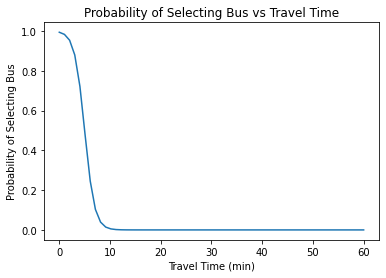

In [20]:
## Show Effects ##

TT = np.linspace(0,60,60)
Utility = Beta_Constant_Opt + Beta_TT_Opt * TT
Prob = np.exp(Utility)/(np.exp(Utility)+1)

plt.plot(TT, Prob)

plt.title('Probability of Selecting Bus vs Travel Time')
plt.xlabel('Travel Time (min)')
plt.ylabel('Probability of Selecting Bus')
plt.show()